In [ ]:
#based on https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a

In [5]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [6]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("train_images shape:", train_images.shape, "test_images shape:", test_images.shape)

train_images shape: (60000, 28, 28) test_images shape: (10000, 28, 28)


In [7]:
train_images[0].shape

(28, 28)

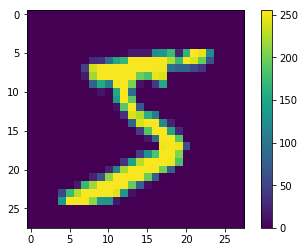

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [9]:
#it goes from 0 to 250. we need to normalize it going from 0 to 1. 
#just divide it by 250

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
#our labels
class_names = ['0', 
               '1', 
               '2', 
               '3', 
               '4', 
               '5', 
               '6', 
               '7', 
               '8', 
               '9']

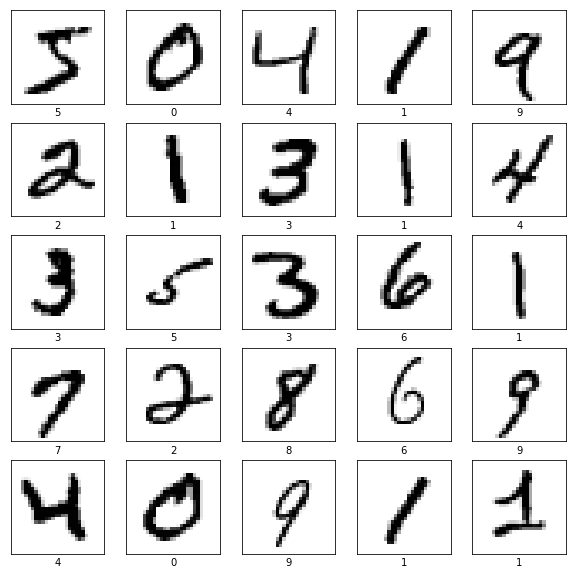

In [12]:
#ploting the first 10 items of training sample

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

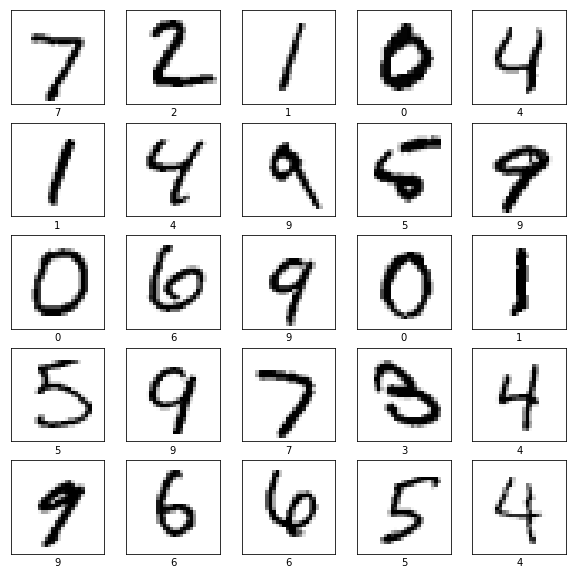

In [29]:
#ploting the first 10 items of testing sample

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])

In [24]:
print("Number of train data - " + str(len(train_images)))
print("Number of test data - " + str(len(test_images)))

Number of train data - 60000
Number of test data - 10000


In [13]:
#defining our neural network

model = tf.keras.Sequential()

#our image is 28x28
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
#compile the model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#our file name of best weights
file_model_name='hwritten.weights.best.hdf5'

In [12]:

#this will make save the results at every epoch
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=file_model_name, verbose = 1, save_best_only=True)

In [28]:
model.fit(train_images,
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59872/60000 [============================>.] - ETA: 0s - loss: 0.2579 - acc: 0.9266
Epoch 00001: val_loss improved from inf to 0.13085, saving model to hwritten.weights.best.hdf5
60000/60000 [==============================] - 20s 327us/step - loss: 0.2576 - acc: 0.9268 - val_loss: 0.1308 - val_acc: 0.9617
Epoch 2/10
59776/60000 [============================>.] - ETA: 0s - loss: 0.1128 - acc: 0.9663- ETA: 4s - loss: 0.1162  - ETA: 3s - loss: 0.1148 -  - 
Epoch 00002: val_loss improved from 0.13085 to 0.09478, saving model to hwritten.weights.best.hdf5
60000/60000 [==============================] - 18s 294us/step - loss: 0.1128 - acc: 0.9663 - val_loss: 0.0948 - val_acc: 0.9715
Epoch 3/10
59808/60000 [============================>.] - ETA: 0s - loss: 0.0773 - acc: 0.9767
Epoch 00003: val_loss improved from 0.09478 to 0.09012, saving model to hwritten.weights.best.hdf5
60000/60000 [==============================] - 20s 326us/ste

In [16]:
# Load the weights with the best validation accuracy
model.load_weights(file_model_name)

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 50us/step
Test accuracy: 0.9781


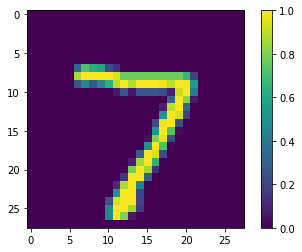

In [18]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)

In [22]:
predictions = model.predict(test_images)
print('predict', np.argmax(predictions[0]))
print('test label', test_labels[0])

predict 7
test label 7


In [23]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

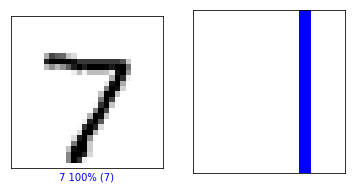

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


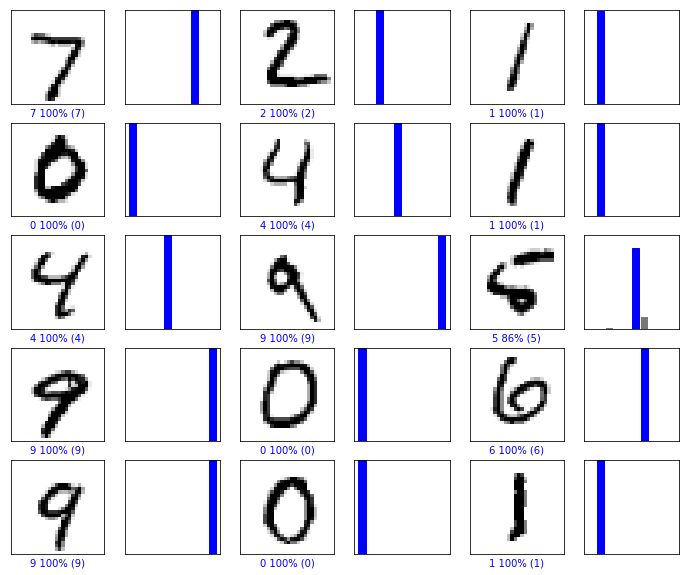

In [25]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)


In [72]:
#let's try from samples from our team - Mavericks Brazil
#kick it
import cv2
from PIL import Image

(28, 28)


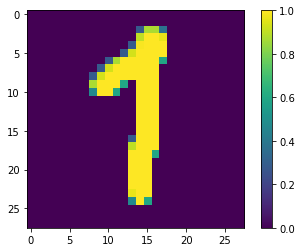

In [120]:
img = cv2.imread('mavericks/1.png', cv2.IMREAD_GRAYSCALE)
img = cv2.bitwise_not(img)

#normalize it
img = img / 255.0

#shape
print(img.shape)

plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)

In [121]:
#let's predict what it is

# Add the image to a batch where it's the only member.
batch = (np.expand_dims(img,0))

print(batch.shape)

predictions_single = model.predict(batch)

#print the result
print(np.argmax(predictions_single))

(1, 28, 28)
1
